데이터 전처리

In [30]:
import pandas as pd
data_raw = pd.read_csv('data_ml.csv')
idx_date = data_raw.index[(
    data_raw['date'] > '1999-12-31') & (
    data_raw['date'] < '2019-01-01')].tolist()
#날짜를 받기 위한 인덱스 생성
data_ml = data_raw.iloc[idx_date]
#날짜 인덱스에 따라 데이터셋 필터링
data_ml.iloc[0:6, 0:6]

features = list(data_ml.iloc[:, 3:95].columns)
# 특성의 열 이름 저장 
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd",
                  "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

1개월 선도 수익률과 상관관계 산점도

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Factors', ylabel='R1M_Usd'>

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


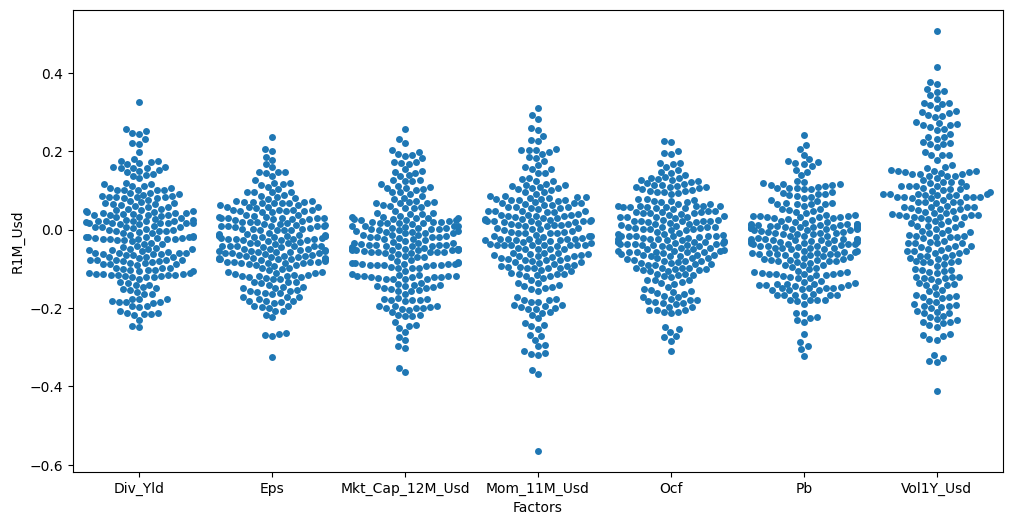

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=[]
cols = features_short+['R1M_Usd', 'date']
data_corr = data_ml[cols]
data_corr = data_corr.groupby('date').corr()[['R1M_Usd']].reset_index()

# 상관계수 계산을 위한 그룹화
data_corr = data_corr.loc[data_corr[data_corr.level_1.str[-7:]!="R1M_Usd"].index]
data_corr.rename(columns={'level_1' : 'Factors'}, inplace=True)
plt.figure(figsize=(12,6))
sns.swarmplot(x="Factors", y="R1M_Usd", data=data_corr)

조건부 기댓값 : 특성에 대한 평활화 함수로서의 평균 수익률

<Axes: xlabel='value', ylabel='R1M_Usd'>

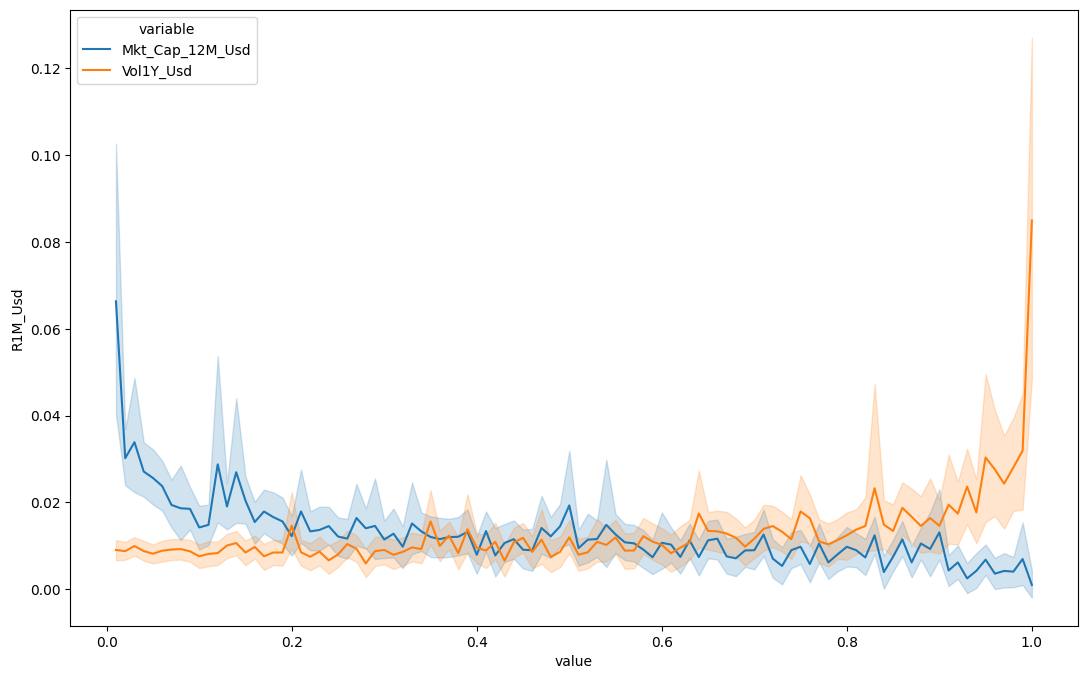

In [ ]:
unpivoted_data_ml = pd.melt(
    data_ml[['R1M_Usd', 'Mkt_Cap_12M_Usd', 'Vol1Y_Usd']], id_vars = 'R1M_Usd'
)
plt.figure(figsize=(13, 8))
sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable')

In [ ]:
# 지난 1년간 평균시가총액 / 변동성은 미래 수익률에 거의 단조로운 영향.
# 평균적으로 수익률은 시가총액에 비례해 감소(사이즈효과)

주식 및 특성별 계산한 자기 상관계수의 히스토그램

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12236\753432451.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ['stock_id', 'variable']).apply(lambda x: x['value'].autocorr(lag=1))


<Axes: >

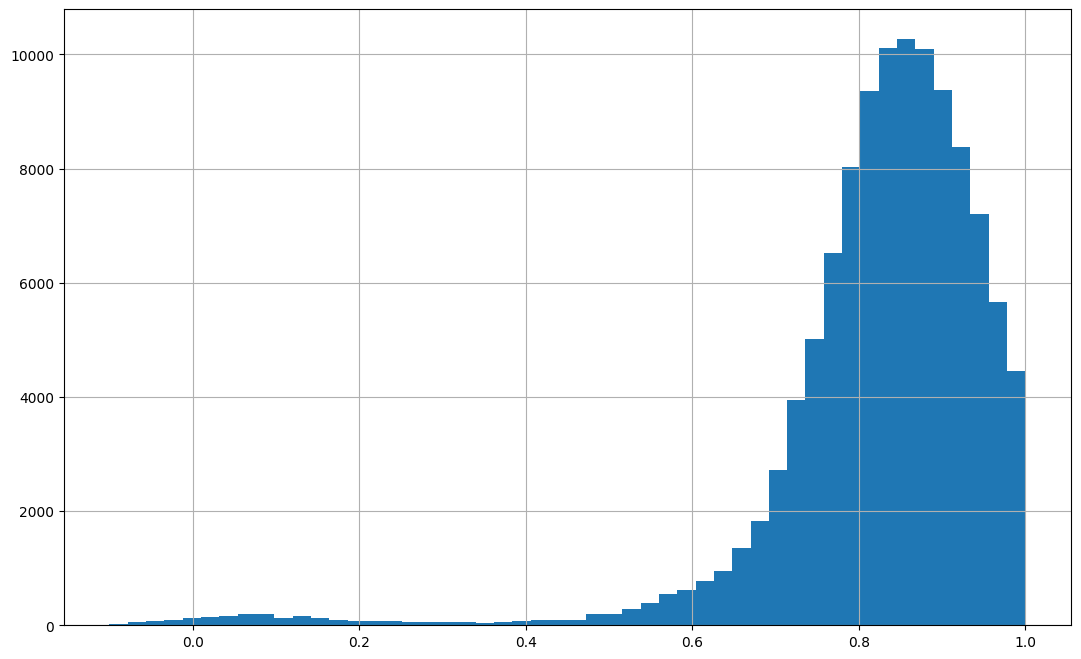

In [ ]:
cols = []
cols = ['stock_id']+list(data_ml.iloc[:,3:95].columns)
# 주식 식별 코드와 변수 쌍으로 정렬 후 자기 상관계수 계산
data_hist_acf = pd.melt(data_ml[cols], id_vars ='stock_id').groupby(
    ['stock_id', 'variable']).apply(lambda x: x['value'].autocorr(lag=1))
plt.figure(figsize=(13,8))
data_hist_acf.hist(bins=50, range=[-0.1,1])

4.8 추가코드

([<matplotlib.axis.XTick at 0x262a4654260>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

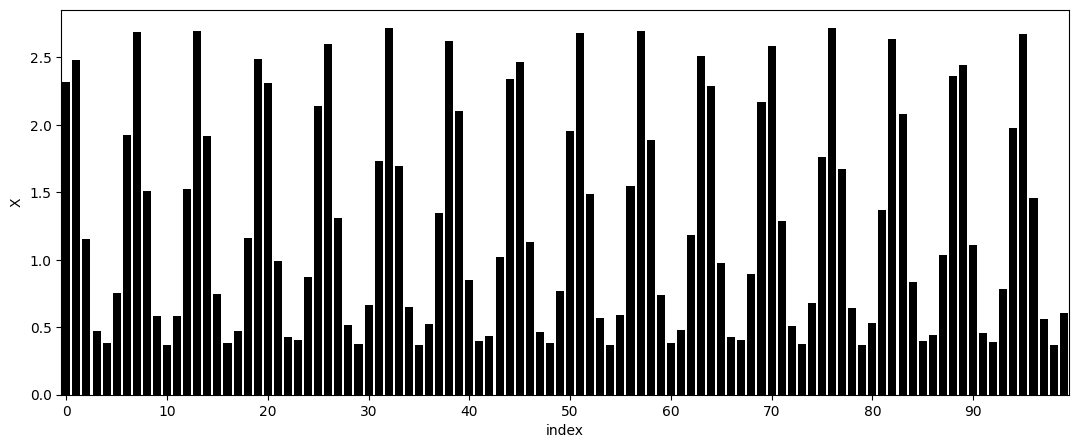

In [ ]:
# 리스케일링 효과 : 시각적 표현
import numpy as np
length = 100
x = np.exp(np.sin(np.linspace(1,length,length)))
data = pd.DataFrame(data=x, columns=['X'])
data.reset_index(inplace=True)
plt.figure(figsize=(13,5))
sns.barplot(y="X", data=data, x="index", color='black')
plt.xticks(data['index'][::10])

([<matplotlib.axis.XTick at 0x262a5086e70>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

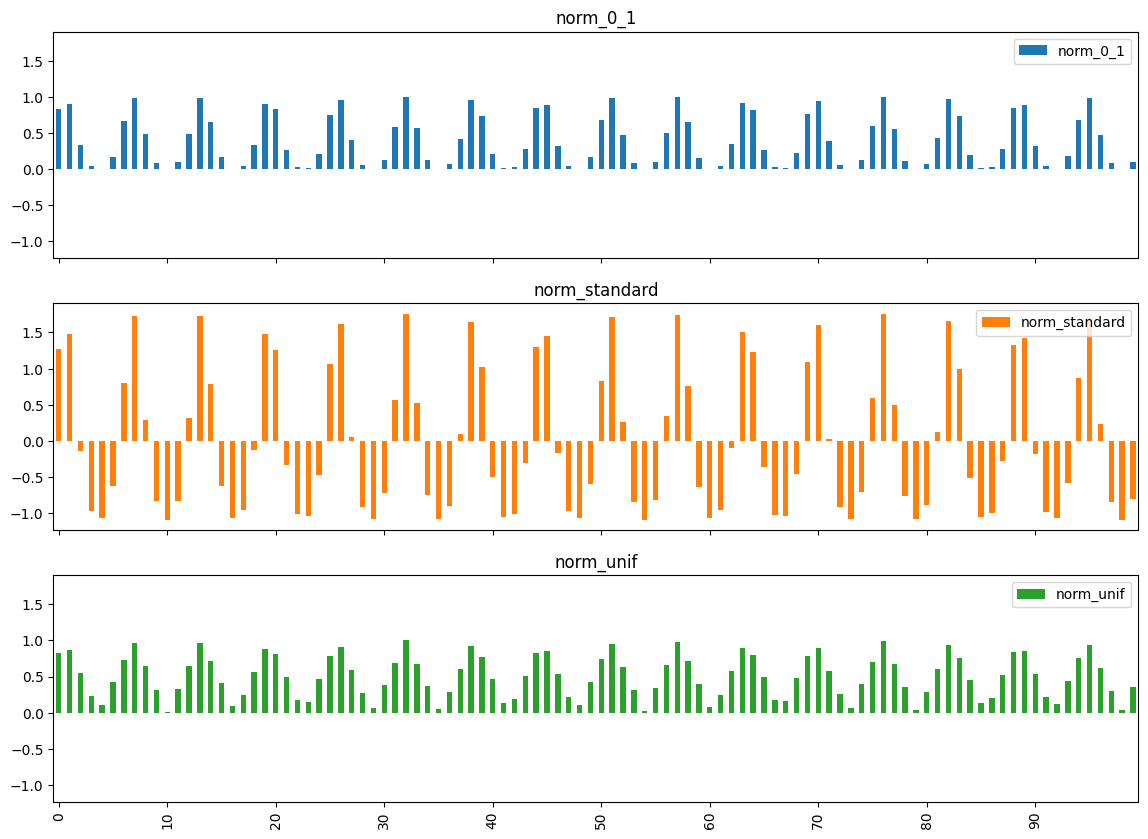

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

def norm_0_1(x):
    return (x-np.min(x)) / (np.max(x) - np.min(x))
def norm_unif(x):
    return (ECDF(x)(x))
def norm_standard(x):
    return (x-np.mean(x))/np.std(x)

data_norm = pd.DataFrame.from_dict(dict(
    index = np.linspace(1,length,length), # 인덱스 생성
    norm_0_1 = norm_0_1(x),
    norm_standard = norm_standard(x),
    norm_unif = norm_unif(x)
))

data_norm.iloc[:,1:4].plot.bar(figsize=(14,10), subplots=True, sharey=True, sharex=True)
plt.xticks(data['index'][::10])

<Axes: ylabel='Frequency'>

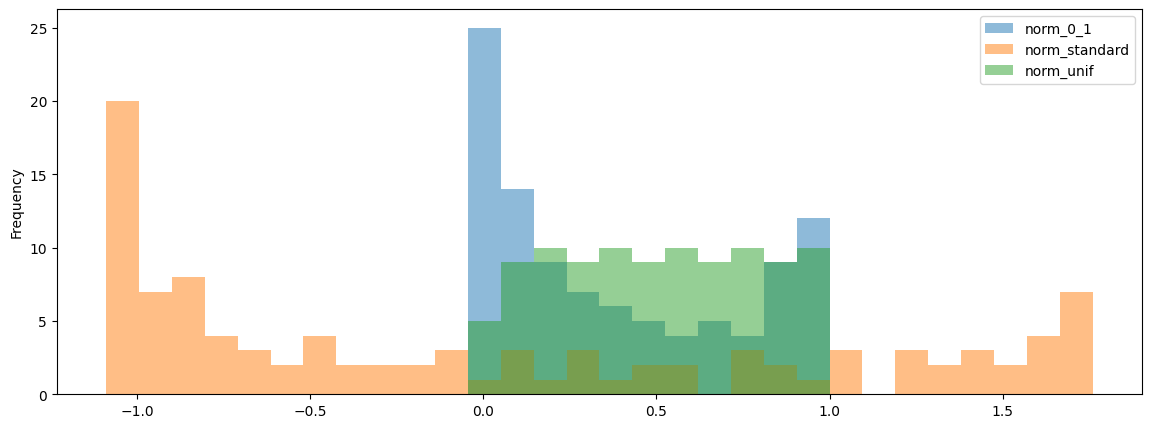

In [ ]:
data_norm.iloc[:,1:4].plot.hist(alpha=0.5, bins=30, figsize=(14,5))

4.8.2 리스케일링 효과 : 토이 예시

In [ ]:
from IPython.display import display, Markdown
cap = np.array([10,50,100,
                15,10,15,
                200,120,80])
returns=np.array([0.06,0.01,-0.06,
                  -0.03,0.00,0.02,
                  -0.04,-0.02,0.00])
date = np.array([1,2,3,1,2,3,1,2,3])
firm = np.array([1,1,1,2,2,2,3,3,3])
toy_data = pd.DataFrame.from_dict(
    dict(firm=firm, date=date, cap=cap, returns=returns,
         cap_norm=norm_0_1(cap), cap_u=norm_unif(cap))
)
display(Markdown(toy_data.to_markdown()))

|    |   firm |   date |   cap |   returns |   cap_norm |    cap_u |
|---:|-------:|-------:|------:|----------:|-----------:|---------:|
|  0 |      1 |      1 |    10 |      0.06 |  0         | 0.222222 |
|  1 |      1 |      2 |    50 |      0.01 |  0.210526  | 0.555556 |
|  2 |      1 |      3 |   100 |     -0.06 |  0.473684  | 0.777778 |
|  3 |      2 |      1 |    15 |     -0.03 |  0.0263158 | 0.444444 |
|  4 |      2 |      2 |    10 |      0    |  0         | 0.222222 |
|  5 |      2 |      3 |    15 |      0.02 |  0.0263158 | 0.444444 |
|  6 |      3 |      1 |   200 |     -0.04 |  1         | 1        |
|  7 |      3 |      2 |   120 |     -0.02 |  0.578947  | 0.888889 |
|  8 |      3 |      3 |    80 |      0    |  0.368421  | 0.666667 |

In [ ]:
import statsmodels.api as sm

X=toy_data.cap_norm.to_numpy()
X=sm.add_constant(X)
model = sm.OLS(returns, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     4.265
Date:                Tue, 19 Nov 2024   Prob (F-statistic):             0.0778
Time:                        13:15:11   Log-Likelihood:                 19.892
No. Observations:                   9   AIC:                            -35.78
Df Residuals:                       7   BIC:                            -35.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0124      0.014      0.912      0.3

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:

X=toy_data.cap_u.to_numpy()
X=sm.add_constant(X)
model = sm.OLS(returns, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     6.672
Date:                Tue, 19 Nov 2024   Prob (F-statistic):             0.0363
Time:                        13:15:13   Log-Likelihood:                 20.764
No. Observations:                   9   AIC:                            -37.53
Df Residuals:                       7   BIC:                            -37.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0457      0.022      2.056      0.0

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


4장 예제

In [ ]:
unrate = pd.read_csv("UNRATE.csv",index_col=0).reset_index()

In [ ]:
unrate.columns = ["date", "unrate"]
dates_vector = pd.DataFrame(data_ml['date'].unique(), columns=['date'])
dates_vector['date'] = pd.to_datetime(dates_vector['date'], errors='coerce').dt.strftime('%Y-%m')
unrate['date'] = pd.to_datetime(unrate['date'], errors='coerce').dt.strftime('%Y-%m')


unrate = pd.merge(
    dates_vector, unrate, how='left', on="date").sort_values(["date"])

In [ ]:
data_ml['date'] = pd.to_datetime(data_ml['date'], errors='coerce').dt.strftime('%Y-%m')
data_cond = data_ml[list(["stock_id", "date"] + features_short)]
names_unrate = list(map(lambda x: x + str("_unrate"), features_short))
feat_unrate = pd.merge(data_cond, unrate, how="inner", on="date")
feat_unrate = feat_unrate[features_short].apply(
    lambda x : x.multiply(feat_unrate["unrate"].astype(float)), axis=0
)
feat_unrate.columns = names_unrate
data_cond = pd.merge(data_cond, feat_unrate, how="inner", left_index=True, right_index=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12236\323779733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['date'] = pd.to_datetime(data_ml['date'], errors='coerce').dt.strftime('%Y-%m')


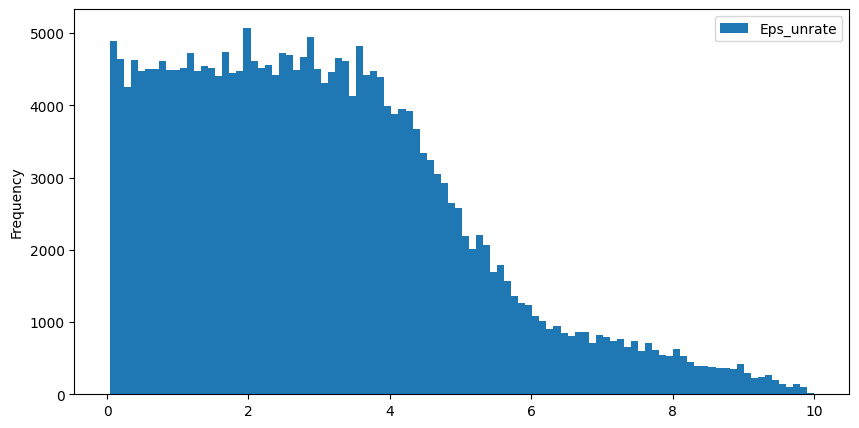

In [ ]:
data_cond[["Eps_unrate"]].plot.hist(bins=100, figsize=(10,5));
#균일화 이전

<Axes: ylabel='Frequency'>

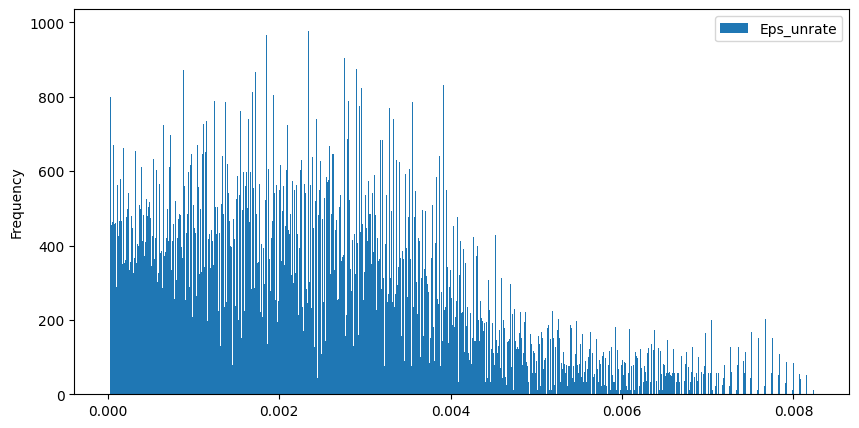

In [ ]:
data_temp = data_cond.groupby(
    ["date"]).apply(lambda df: norm_0_1(df))

data_temp[["Eps_unrate"]].plot.hist(bins=1000, figsize=[10,5])

In [6]:
vix = pd.read_csv("VIXCLS.csv", index_col=0).reset_index()

In [17]:
print(type(vix))


<class 'pandas.core.frame.DataFrame'>


In [21]:
vix.columns = ["date", "vix"]
dates_vector = pd.DataFrame(data_ml['date'].unique(), columns=['date'])
vix = pd.merge(dates_vector, vix, how="left", on="date").sort_values(["date"])
vix = vix.ffill()
vix.drop_duplicates()

,date,vix
207,2000-01-31,24.95
208,2000-02-29,23.37
120,2000-03-31,24.11
121,2000-04-30,24.11
122,2000-05-31,23.65
...,...,...
98,2018-08-31,12.86
99,2018-09-30,12.86
100,2018-10-31,21.23
101,2018-11-30,18.07


<Axes: xlabel='year'>

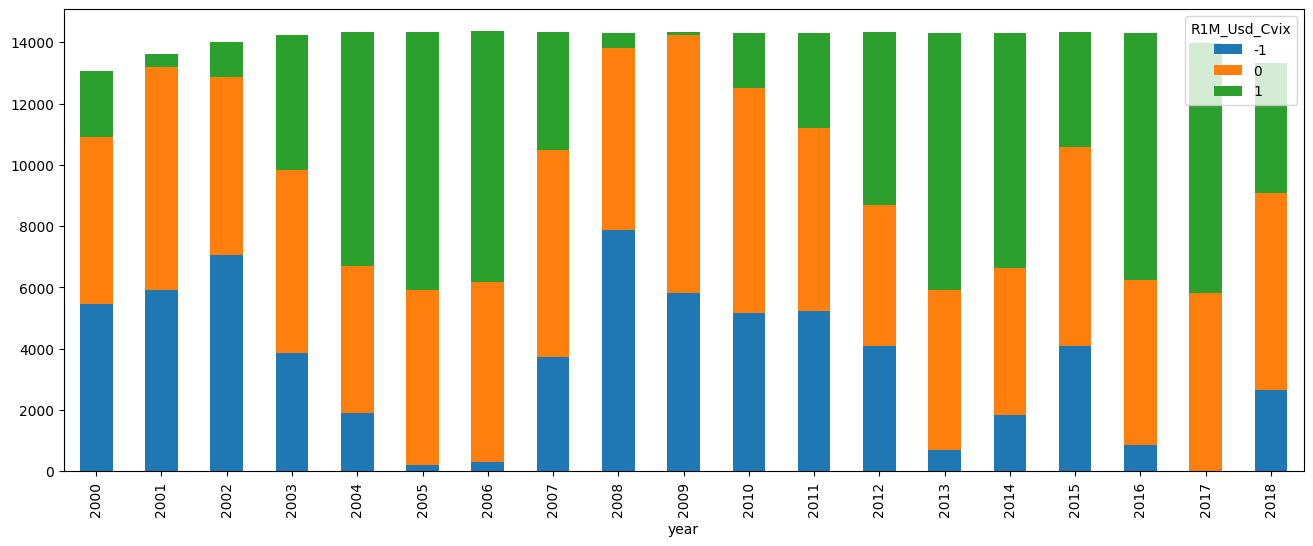

In [27]:
import numpy as np
from pandas import Series

delta = 0.5
vix["vix"] = pd.to_numeric(vix["vix"], errors='coerce')
vix_bar = np.median(vix["vix"])
data_vix = pd.merge(
    data_ml[["stock_id", "date", "R1M_Usd"]], vix, how='inner', on="date"
)
vix_series: Series = data_vix["vix"] # data_vix["vix"] 를 Series 로 인식못함, 따라서 pylance의 타입힌팅 추가

data_vix["r_minus"] = (-0.02) * np.exp(-delta*(vix_series- vix_bar)) 
data_vix["r_plus"] = 0.02 * np.exp(delta*(vix_series- vix_bar))

rules = [data_vix["R1M_Usd"]>data_vix["r_plus"],
         (data_vix["R1M_Usd"]>=data_vix["r_minus"]) &
          (data_vix["R1M_Usd"]<=data_vix["r_plus"]),
          data_vix["R1M_Usd"]<data_vix["r_minus"]]
#새로운 레이블 및 연도 열 생성
data_vix["R1M_Usd_Cvix"] = np.select(rules, [1, 0, -1])
data_vix["year"] = pd.to_datetime(data_vix["date"]).dt.year

data_vix = data_vix.groupby(
    ['year', 'R1M_Usd_Cvix'])['stock_id'].count().unstack()
data_vix.plot(kind='bar', stacked=True, figsize=(16,6))



<Axes: >

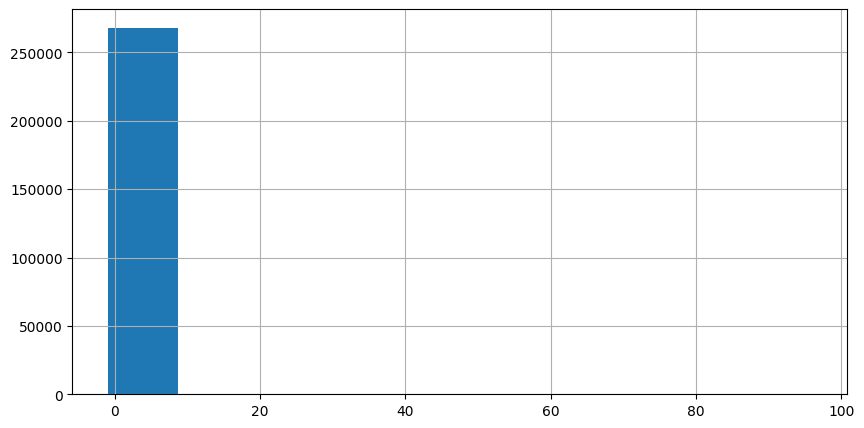

In [32]:
data_ml["R12M_Usd"].hist(figsize=(10,5))

In [33]:
data_ml.loc[data_ml["R12M_Usd"] >50,["stock_id", "date", "R12M_Usd"]]

,stock_id,date,R12M_Usd
1700,683,2009-03-31,64.830
3611,296,2002-06-30,72.240
46482,221,2008-12-31,53.474
46483,221,2009-01-31,55.161
46484,221,2009-02-28,54.804
64781,683,2009-02-28,95.972
197541,212,2000-12-31,52.993
282295,862,2009-02-28,57.976


In [34]:
data_tmp = data_ml.loc[data_ml["stock_id"] == 683,:].copy()
data_tmp['year'] = pd.to_datetime(data_tmp["date"]).dt.year
data_tmp.loc[data_tmp['year'] == 2009,["date", "R1M_Usd"]].sort_values(['date'])

,date,R1M_Usd
64780,2009-01-31,-0.625
64781,2009-02-28,0.472
1700,2009-03-31,1.440
1701,2009-04-30,0.139
1702,2009-05-31,0.086
1703,2009-06-30,0.185
1704,2009-07-31,0.363
1705,2009-08-31,0.103
1706,2009-09-30,9.914
1707,2009-10-31,0.101
